In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score

## Reading in the Data

In [2]:
dashboard_2015 = pd.read_csv(r'.\Datasets\2015 Dashboard.csv')
batted_ball_2015 = pd.read_csv(r'.\Datasets\2015 Batted Ball.csv')
statcast_2015 = pd.read_csv(r'.\Datasets\2015 Statcast.csv')
dashboard_2016 = pd.read_csv(r'.\Datasets\2016 Dashboard.csv')
batted_ball_2016 = pd.read_csv(r'.\Datasets\2016 Batted Ball.csv')
statcast_2016 = pd.read_csv(r'.\Datasets\2016 Statcast.csv')
dashboard_2017 = pd.read_csv(r'.\Datasets\2017 Dashboard.csv')
batted_ball_2017 = pd.read_csv(r'.\Datasets\2017 Batted Ball.csv')
statcast_2017 = pd.read_csv(r'.\Datasets\2017 Statcast.csv')
dashboard_2018 = pd.read_csv(r'.\Datasets\2018 Dashboard.csv')
batted_ball_2018 = pd.read_csv(r'.\Datasets\2018 Batted Ball.csv')
statcast_2018 = pd.read_csv(r'.\Datasets\2018 Statcast.csv')
dashboard_2019 = pd.read_csv(r'.\Datasets\2019 Dashboard.csv')
batted_ball_2019 = pd.read_csv(r'.\Datasets\2019 Batted Ball.csv')
statcast_2019 = pd.read_csv(r'.\Datasets\2019 Statcast.csv')
dashboard_2020 = pd.read_csv(r'.\Datasets\2020 Dashboard.csv')
batted_ball_2020 = pd.read_csv(r'.\Datasets\2020 Batted Ball.csv')
statcast_2020 = pd.read_csv(r'.\Datasets\2020 Statcast.csv')
dashboard_2021 = pd.read_csv(r'.\Datasets\2021 Dashboard.csv')
batted_ball_2021 = pd.read_csv(r'.\Datasets\2021 Batted Ball.csv')
statcast_2021 = pd.read_csv(r'.\Datasets\2021 Statcast.csv')
dashboard_2022 = pd.read_csv(r'.\Datasets\2022 Dashboard.csv')
batted_ball_2022 = pd.read_csv(r'.\Datasets\2022 Batted Ball.csv')
statcast_2022 = pd.read_csv(r'.\Datasets\2022 Statcast.csv')

### Dealing with 2020

Due to the pandemic, there were only 60 regular season games in the 2020 MLB season, as opposed to 162 in a normal year. To work around this, I lowered the plate appearance threshold in 2020 to 70, which resulted in a similar-sized player pool (approximately 350) to the rest of the years, and for any "counting stats," like Home Runs or Plate Apppearances or whatever, I will scale them up by an appropriate factor to make it seem like it was over a 162 game season. This does however not address the variance in home runs vs. predictive factors in a smaller sample of games (i.e. hitting 15 home runs in 60 games when the data suggests the expected HR total was 10 now becomes hitting 40 home runs with an expected total of like 25), but we're just going to have to live with it and hopefully that variance evens out across the player pool.

## Cleaning the Data

- Combine yearly frames by player
- Add a year column
- Add following season HR total to the frames
- Filter out players with a missing value in the HR total
- Subset variables that could be useful
- Divide yearly frames into 80% train and 20% test using random functions with a set seed
- Combine the yearly train frames into an overall train set and same for test
- Format percentages

In [3]:
dashboard_2015_merge = dashboard_2015.loc[:, ['Name', 'G', 'PA', 'HR', 'BB%', 'K%', 'playerid']]
batted_ball_2015_merge = batted_ball_2015.loc[:, ['LD%', 'GB%', 'FB%', 'IFFB%', 'HR/FB', 'Pull%', 'Cent%', 'Oppo%', 'playerid']]
statcast_2015_merge = statcast_2015.loc[:, ['EV', 'maxEV', 'LA', 'Barrel%', 'HardHit%', 'playerid']]

temp_frame_2015 = pd.merge(dashboard_2015_merge, batted_ball_2015_merge, on = 'playerid')
temp_frame_2015_2 = pd.merge(temp_frame_2015, statcast_2015_merge, on = 'playerid')

temp_frame_2015_2['Year'] = 2015

next_season_hr_2015 = dashboard_2016.loc[:, ['HR', 'playerid']]
next_season_hr_2015 = next_season_hr_2015.rename(columns = {'HR':'Next_Year_HR'})

frame_2015 = pd.merge(temp_frame_2015_2, next_season_hr_2015, on = 'playerid')

frame_2015.shape

(271, 22)

In [4]:
271 * 0.8

216.8

In [5]:
train_2015 = frame_2015.sample(n = 217, random_state = 1)
temp_df = frame_2015.merge(train_2015.drop_duplicates(), on = ['Name', 'G', 'PA', 'HR', 'BB%', 'K%', 'playerid', 'LD%', 'GB%', 'FB%',
       'IFFB%', 'HR/FB', 'Pull%', 'Cent%', 'Oppo%', 'EV', 'maxEV', 'LA',
       'Barrel%', 'HardHit%', 'Year', 'Next_Year_HR'], how = 'left', indicator = True)
test_2015 = temp_df.loc[temp_df['_merge'] == 'left_only', :]
test_2015 = test_2015.drop('_merge', axis = 1)

In [6]:
dashboard_2016_merge = dashboard_2016.loc[:, ['Name', 'G', 'PA', 'HR', 'BB%', 'K%', 'playerid']]
batted_ball_2016_merge = batted_ball_2016.loc[:, ['LD%', 'GB%', 'FB%', 'IFFB%', 'HR/FB', 'Pull%', 'Cent%', 'Oppo%', 'playerid']]
statcast_2016_merge = statcast_2016.loc[:, ['EV', 'maxEV', 'LA', 'Barrel%', 'HardHit%', 'playerid']]

temp_frame_2016 = pd.merge(dashboard_2016_merge, batted_ball_2016_merge, on = 'playerid')
temp_frame_2016_2 = pd.merge(temp_frame_2016, statcast_2016_merge, on = 'playerid')

temp_frame_2016_2['Year'] = 2016

next_season_hr_2016 = dashboard_2017.loc[:, ['HR', 'playerid']]
next_season_hr_2016 = next_season_hr_2016.rename(columns = {'HR':'Next_Year_HR'})

frame_2016 = pd.merge(temp_frame_2016_2, next_season_hr_2016, on = 'playerid')

frame_2016.shape

(261, 22)

In [7]:
261 * 0.8

208.8

In [8]:
train_2016 = frame_2016.sample(n = 219, random_state = 1)
temp_df = frame_2016.merge(train_2016.drop_duplicates(), on = ['Name', 'G', 'PA', 'HR', 'BB%', 'K%', 'playerid', 'LD%', 'GB%', 'FB%',
       'IFFB%', 'HR/FB', 'Pull%', 'Cent%', 'Oppo%', 'EV', 'maxEV', 'LA',
       'Barrel%', 'HardHit%', 'Year', 'Next_Year_HR'], how = 'left', indicator = True)
test_2016 = temp_df.loc[temp_df['_merge'] == 'left_only', :]
test_2016 = test_2016.drop('_merge', axis = 1)

In [9]:
dashboard_2017_merge = dashboard_2017.loc[:, ['Name', 'G', 'PA', 'HR', 'BB%', 'K%', 'playerid']]
batted_ball_2017_merge = batted_ball_2017.loc[:, ['LD%', 'GB%', 'FB%', 'IFFB%', 'HR/FB', 'Pull%', 'Cent%', 'Oppo%', 'playerid']]
statcast_2017_merge = statcast_2017.loc[:, ['EV', 'maxEV', 'LA', 'Barrel%', 'HardHit%', 'playerid']]

temp_frame_2017 = pd.merge(dashboard_2017_merge, batted_ball_2017_merge, on = 'playerid')
temp_frame_2017_2 = pd.merge(temp_frame_2017, statcast_2017_merge, on = 'playerid')

temp_frame_2017_2['Year'] = 2017

next_season_hr_2017 = dashboard_2018.loc[:, ['HR', 'playerid']]
next_season_hr_2017 = next_season_hr_2017.rename(columns = {'HR':'Next_Year_HR'})

frame_2017 = pd.merge(temp_frame_2017_2, next_season_hr_2017, on = 'playerid')

frame_2017.shape

(277, 22)

In [10]:
277 * 0.8

221.60000000000002

In [11]:
train_2017 = frame_2017.sample(n = 222, random_state = 1)
temp_df = frame_2017.merge(train_2017.drop_duplicates(), on = ['Name', 'G', 'PA', 'HR', 'BB%', 'K%', 'playerid', 'LD%', 'GB%', 'FB%',
       'IFFB%', 'HR/FB', 'Pull%', 'Cent%', 'Oppo%', 'EV', 'maxEV', 'LA',
       'Barrel%', 'HardHit%', 'Year', 'Next_Year_HR'], how = 'left', indicator = True)
test_2017 = temp_df.loc[temp_df['_merge'] == 'left_only', :]
test_2017 = test_2017.drop('_merge', axis = 1)

In [12]:
dashboard_2018_merge = dashboard_2018.loc[:, ['Name', 'G', 'PA', 'HR', 'BB%', 'K%', 'playerid']]
batted_ball_2018_merge = batted_ball_2018.loc[:, ['LD%', 'GB%', 'FB%', 'IFFB%', 'HR/FB', 'Pull%', 'Cent%', 'Oppo%', 'playerid']]
statcast_2018_merge = statcast_2018.loc[:, ['EV', 'maxEV', 'LA', 'Barrel%', 'HardHit%', 'playerid']]

temp_frame_2018 = pd.merge(dashboard_2018_merge, batted_ball_2018_merge, on = 'playerid')
temp_frame_2018_2 = pd.merge(temp_frame_2018, statcast_2018_merge, on = 'playerid')

temp_frame_2018_2['Year'] = 2018

next_season_hr_2018 = dashboard_2019.loc[:, ['HR', 'playerid']]
next_season_hr_2018 = next_season_hr_2018.rename(columns = {'HR':'Next_Year_HR'})

frame_2018 = pd.merge(temp_frame_2018_2, next_season_hr_2018, on = 'playerid')

frame_2018.shape

(262, 22)

In [13]:
262 * 0.8

209.60000000000002

In [14]:
train_2018 = frame_2018.sample(n = 210, random_state = 1)
temp_df = frame_2018.merge(train_2018.drop_duplicates(), on = ['Name', 'G', 'PA', 'HR', 'BB%', 'K%', 'playerid', 'LD%', 'GB%', 'FB%',
       'IFFB%', 'HR/FB', 'Pull%', 'Cent%', 'Oppo%', 'EV', 'maxEV', 'LA',
       'Barrel%', 'HardHit%', 'Year', 'Next_Year_HR'], how = 'left', indicator = True)
test_2018 = temp_df.loc[temp_df['_merge'] == 'left_only', :]
test_2018 = test_2018.drop('_merge', axis = 1)

In [15]:
dashboard_2019_merge = dashboard_2019.loc[:, ['Name', 'G', 'PA', 'HR', 'BB%', 'K%', 'playerid']]
batted_ball_2019_merge = batted_ball_2019.loc[:, ['LD%', 'GB%', 'FB%', 'IFFB%', 'HR/FB', 'Pull%', 'Cent%', 'Oppo%', 'playerid']]
statcast_2019_merge = statcast_2019.loc[:, ['EV', 'maxEV', 'LA', 'Barrel%', 'HardHit%', 'playerid']]

temp_frame_2019 = pd.merge(dashboard_2019_merge, batted_ball_2019_merge, on = 'playerid')
temp_frame_2019_2 = pd.merge(temp_frame_2019, statcast_2019_merge, on = 'playerid')

temp_frame_2019_2['Year'] = 2019

next_season_hr_2019 = dashboard_2020.loc[:, ['HR', 'playerid']]
next_season_hr_2019['HR'] = next_season_hr_2019['HR'].apply(lambda x: int((162/60)*x))
next_season_hr_2019 = next_season_hr_2019.rename(columns = {'HR':'Next_Year_HR'})

frame_2019 = pd.merge(temp_frame_2019_2, next_season_hr_2019, on = 'playerid')

frame_2019.shape

(282, 22)

In [16]:
282 * 0.8

225.60000000000002

In [17]:
train_2019 = frame_2019.sample(n = 226, random_state = 1)
temp_df = frame_2019.merge(train_2019.drop_duplicates(), on = ['Name', 'G', 'PA', 'HR', 'BB%', 'K%', 'playerid', 'LD%', 'GB%', 'FB%',
       'IFFB%', 'HR/FB', 'Pull%', 'Cent%', 'Oppo%', 'EV', 'maxEV', 'LA',
       'Barrel%', 'HardHit%', 'Year', 'Next_Year_HR'], how = 'left', indicator = True)
test_2019 = temp_df.loc[temp_df['_merge'] == 'left_only', :]
test_2019 = test_2019.drop('_merge', axis = 1)

In [18]:
dashboard_2020_merge = dashboard_2020.loc[:, ['Name', 'G', 'PA', 'HR', 'BB%', 'K%', 'playerid']]
dashboard_2020_merge['G'] = dashboard_2020_merge['G'].apply(lambda x: int((162/60) * x))
dashboard_2020_merge['PA'] = dashboard_2020_merge['PA'].apply(lambda x: int((162/60) * x))
dashboard_2020_merge['HR'] = dashboard_2020_merge['HR'].apply(lambda x: int((162/60) * x))
batted_ball_2020_merge = batted_ball_2020.loc[:, ['LD%', 'GB%', 'FB%', 'IFFB%', 'HR/FB', 'Pull%', 'Cent%', 'Oppo%', 'playerid']]
statcast_2020_merge = statcast_2020.loc[:, ['EV', 'maxEV', 'LA', 'Barrel%', 'HardHit%', 'playerid']]

temp_frame_2020 = pd.merge(dashboard_2020_merge, batted_ball_2020_merge, on = 'playerid')
temp_frame_2020_2 = pd.merge(temp_frame_2020, statcast_2020_merge, on = 'playerid')

temp_frame_2020_2['Year'] = 2020

next_season_hr_2020 = dashboard_2021.loc[:, ['HR', 'playerid']]
next_season_hr_2020 = next_season_hr_2020.rename(columns = {'HR':'Next_Year_HR'})

frame_2020 = pd.merge(temp_frame_2020_2, next_season_hr_2020, on = 'playerid')

frame_2020.shape

(271, 22)

In [19]:
271 * 0.8

216.8

In [20]:
train_2020 = frame_2020.sample(n = 217, random_state = 1)
temp_df = frame_2020.merge(train_2020.drop_duplicates(), on = ['Name', 'G', 'PA', 'HR', 'BB%', 'K%', 'playerid', 'LD%', 'GB%', 'FB%',
       'IFFB%', 'HR/FB', 'Pull%', 'Cent%', 'Oppo%', 'EV', 'maxEV', 'LA',
       'Barrel%', 'HardHit%', 'Year', 'Next_Year_HR'], how = 'left', indicator = True)
test_2020 = temp_df.loc[temp_df['_merge'] == 'left_only', :]
test_2020 = test_2020.drop('_merge', axis = 1)

In [21]:
dashboard_2021_merge = dashboard_2021.loc[:, ['Name', 'G', 'PA', 'HR', 'BB%', 'K%', 'playerid']]
batted_ball_2021_merge = batted_ball_2021.loc[:, ['LD%', 'GB%', 'FB%', 'IFFB%', 'HR/FB', 'Pull%', 'Cent%', 'Oppo%', 'playerid']]
statcast_2021_merge = statcast_2021.loc[:, ['EV', 'maxEV', 'LA', 'Barrel%', 'HardHit%', 'playerid']]

temp_frame_2021 = pd.merge(dashboard_2021_merge, batted_ball_2021_merge, on = 'playerid')
temp_frame_2021_2 = pd.merge(temp_frame_2021, statcast_2021_merge, on = 'playerid')

temp_frame_2021_2['Year'] = 2021

next_season_hr_2021 = dashboard_2022.loc[:, ['HR', 'playerid']]
next_season_hr_2021 = next_season_hr_2021.rename(columns = {'HR':'Next_Year_HR'})

frame_2021 = pd.merge(temp_frame_2021_2, next_season_hr_2021, on = 'playerid')

frame_2021.shape

(267, 22)

In [22]:
267 * 0.8

213.60000000000002

In [23]:
train_2021 = frame_2021.sample(n = 214, random_state = 1)
temp_df = frame_2021.merge(train_2021.drop_duplicates(), on = ['Name', 'G', 'PA', 'HR', 'BB%', 'K%', 'playerid', 'LD%', 'GB%', 'FB%',
       'IFFB%', 'HR/FB', 'Pull%', 'Cent%', 'Oppo%', 'EV', 'maxEV', 'LA',
       'Barrel%', 'HardHit%', 'Year', 'Next_Year_HR'], how = 'left', indicator = True)
test_2021 = temp_df.loc[temp_df['_merge'] == 'left_only', :]
test_2021 = test_2021.drop('_merge', axis = 1)

In [24]:
train = pd.concat([train_2015, train_2016, train_2017, train_2018, train_2019, train_2020, train_2021])

In [25]:
train = train.rename(columns = {'Barrel%': 'Barrel', 'HardHit%': 'HardHit', 'HR/FB': 'HRperFB', 'BB%':'BB', 'K%':'K', 'FB%':'FB', 'Pull%':'Pull', 'GB%':'GB', 'LD%':'LD','IFFB%':'IFFB', 'Cent%':'Cent', 'Oppo%':'Oppo'})

In [26]:
test = pd.concat([test_2015, test_2016, test_2017, test_2018, test_2019, test_2020, test_2021])

In [27]:
test = test.rename(columns = {'Barrel%': 'Barrel', 'HardHit%': 'HardHit', 'HR/FB': 'HRperFB', 'BB%':'BB', 'K%':'K', 'FB%':'FB', 'Pull%':'Pull', 'GB%':'GB', 'LD%':'LD','IFFB%':'IFFB', 'Cent%':'Cent', 'Oppo%':'Oppo'})

In [28]:
def remove_percentage_sign(variable):
    if variable.dtypes == 'O':
        variable = variable.str.replace('%', '')
        variable = pd.to_numeric(variable, errors = 'coerce')
    return variable

In [29]:
train.loc[:, 'G':] = train.loc[:, 'G':].apply(remove_percentage_sign)

In [30]:
test.loc[:, 'G':] = test.loc[:, 'G':].apply(remove_percentage_sign)

## Notes on Cleaning

`train` and `test` datasets have been created using 80% and 20% of the observations from 2015-2021 respectively, just run all of the code above and it should work.

## Variable Descriptions

Excluding `'Name'` and `'playerid'`, there are 20 variables in the dataset to work with. Below are descriptions of them all.

All percentages are on a scale of 0 to 100, not 0 to 1.

- `'Next_Year_HR'` (Response): Pretty explanatory, it's the number of home runs a player hit in the following season, which is what we're trying to predict. So, if an observation is Mike Trout in 2016, the value in this column is the number of home runs he hit in the 2017 season.
- `'G'`: The number of games played (out of 162) that season.
- `'PA'`: The number of plate appearances recorded that season.
- `'HR'`: The number of home runs hit that season.
- `'BB'`: The percentage of plate apperances that resulted in a walk.
- `'K'`: The percentage of plate appearances that resulted in a strikeout.
- `'LD'`/`'GB'`/`'FB'`: The percentage of batted ball events that are line drives/ground balls/fly balls.
- `'IFFB'`: The percentage of fly balls that are infield fly balls.
- `'HRperFB`': The percentage of fly balls that are home runs.
- `'Pull'`/`'Cent'`/`'Oppo'`: The percentage of batted ball events that are hit in the three directions. For a right-handed hitter, pulling the ball means hitting it to left field and going to opposite field means hitting it to right field, and vice versa for left-handed batters. Generally, players will hit more home runs pulling the ball than going to center field, and even more than going to opposite field.
- `'EV'`: Average exit velocity in mph of the ball off the bat of all batted balls.
- `'maxEV'`: Fastest recorded exit velocity in mph of all batted balls.
- `'LA'`: Average angle of the trajectory of the ball off the bat of all batted balls. On a scale of -90 to 90 for each individual event, positive meaning it's going in the air, and negative meaning it's going into the ground.
- `'Barrel'`: Percentage of batted balls with exit velocity/launch angle profiles that have historically resulted in a hit at least 50% of the time.
- `'HardHit'`: The exact formula for determining what a qualifies as a hard hit ball is proprietary, but the name is pretty self explanatory.

# Exploratory Data Analysis

## Correlations

In [31]:
train.corrwith(train['Next_Year_HR']).sort_values(ascending = False)

Next_Year_HR    1.000000
HR              0.580841
Barrel          0.510056
EV              0.484289
HardHit         0.475586
maxEV           0.469366
HRperFB         0.456887
FB              0.355472
PA              0.331875
LA              0.286869
Pull            0.284040
G               0.248870
BB              0.186282
K               0.162704
IFFB            0.055192
playerid        0.036181
Year           -0.047982
LD             -0.130726
Cent           -0.167033
Oppo           -0.246531
GB             -0.292824
dtype: float64

## Plotting Relationships Between Response and Predictors

### `HR`

Text(0, 0.5, 'Next Season HR')

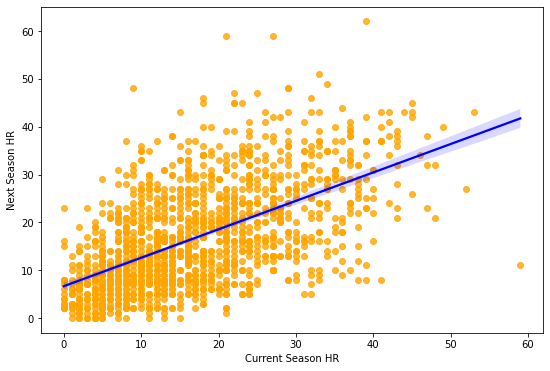

In [32]:
plt.rcParams["figure.figsize"] = (9,6)
ax = sns.regplot(x = train['HR'], y = train['Next_Year_HR'], color = 'orange', line_kws = {'color':'blue'})
plt.xlabel('Current Season HR')
plt.ylabel('Next Season HR')

### `Barrel`

Text(0, 0.5, 'Next Season HR')

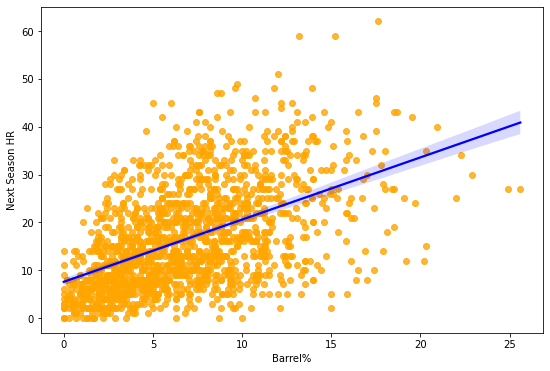

In [33]:
ax = sns.regplot(x = train['Barrel'], y = train['Next_Year_HR'], color = 'orange', line_kws = {'color':'blue'})
plt.xlabel('Barrel%')
plt.ylabel('Next Season HR')

### `EV`

Text(0, 0.5, 'Next Season HR')

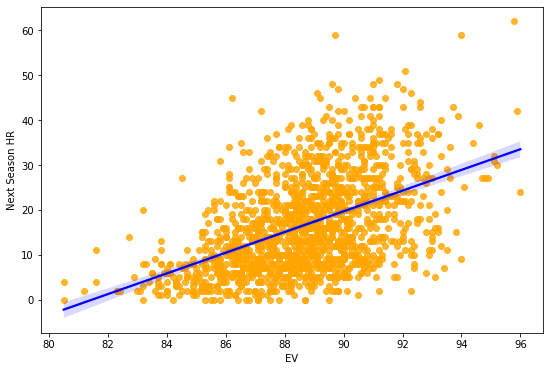

In [34]:
ax = sns.regplot(x = train['EV'], y = train['Next_Year_HR'], color = 'orange', line_kws = {'color':'blue'})
plt.xlabel('EV')
plt.ylabel('Next Season HR')

### `HardHit`

Text(0, 0.5, 'Next Season HR')

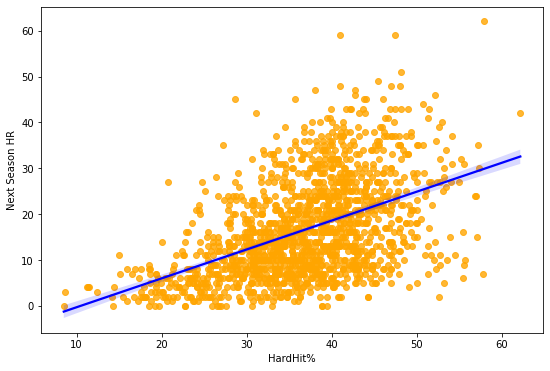

In [35]:
ax = sns.regplot(x = train['HardHit'], y = train['Next_Year_HR'], color = 'orange', line_kws = {'color':'blue'})
plt.xlabel('HardHit%')
plt.ylabel('Next Season HR')

### `MaxEV`

Text(0, 0.5, 'Next Season HR')

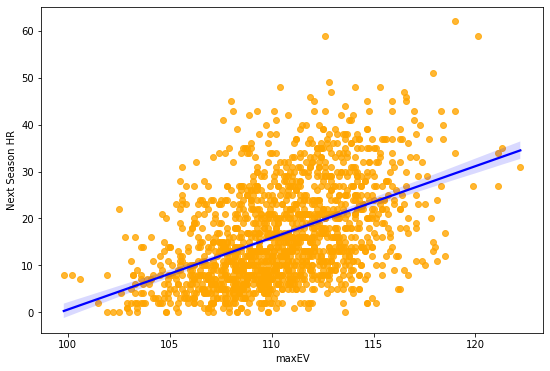

In [36]:
ax = sns.regplot(x = train['maxEV'], y = train['Next_Year_HR'], color = 'orange', line_kws = {'color':'blue'})
plt.xlabel('maxEV')
plt.ylabel('Next Season HR')

### `HRperFB`

Text(0, 0.5, 'Next Season HR')

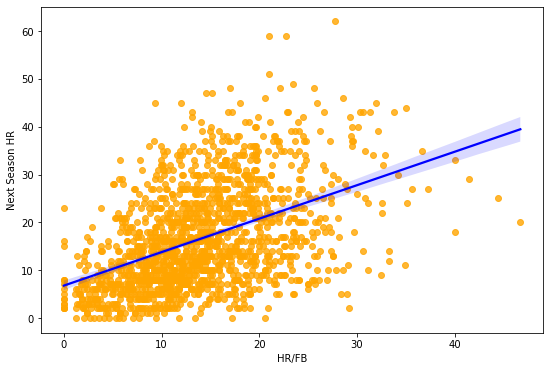

In [37]:
ax = sns.regplot(x = train['HRperFB'], y = train['Next_Year_HR'], color = 'orange', line_kws = {'color':'blue'})
plt.xlabel('HR/FB')
plt.ylabel('Next Season HR')

Seems like everything is basically linear, so transformations will probably not be necessary, at least with individual predictors.

# Model with the Six Most Correlated Variables

In [38]:
model = smf.ols(formula = 'Next_Year_HR~HR+Barrel+EV+HardHit+maxEV+HRperFB', data = train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Next_Year_HR   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     164.4
Date:                Thu, 02 Mar 2023   Prob (F-statistic):          3.92e-161
Time:                        19:06:51   Log-Likelihood:                -5387.6
No. Observations:                1525   AIC:                         1.079e+04
Df Residuals:                    1518   BIC:                         1.083e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -116.1197     20.382     -5.697      0.000    -156.100     -76.140
HR             0.4533      0.031     14.430      0.000       0.392       0.515
Barrel         0.3377      0.110      3.079      0.002       0.123       0.553
EV             0.8121      0.245      3.317      0.001       0.332       1.292
HardHit       -0.0434      0.075     -0.576      0.565      -0.191       0.104
maxEV          0.5042      0.091      5.553      0.000       0.326       0.682
HRperFB       -0.2363      0.060     -3.910      0.000      -0.355      -0.118
==============================================================================
Omnibus:                       81.038   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.273
Skew:                           0.541   Prob(JB):                     7.54e-22
Kurtosis:                       3.600   Cond. No.                     1.42e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### RSE

In [39]:
np.sqrt(model.mse_resid)

8.29978827179134

### RMSE

In [40]:
pred = model.predict(test)
mean_squared_error(test['Next_Year_HR'], pred, squared = False)

8.222653148479592

## Residual Plot

Text(0, 0.5, 'Residuals')

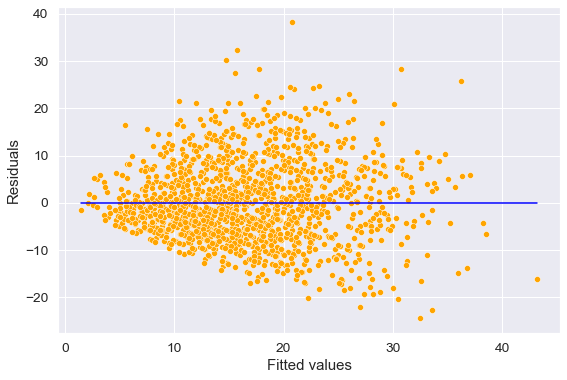

In [41]:
sns.set(font_scale=1.25)
ax = sns.scatterplot(x = model.fittedvalues, y=model.resid,color = 'orange')
sns.lineplot(x = [model.fittedvalues.min(), model.fittedvalues.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

## Outlier Detection

### Outliers

In [42]:
out = model.outlier_test()

Text(0, 0.5, 'Residuals')

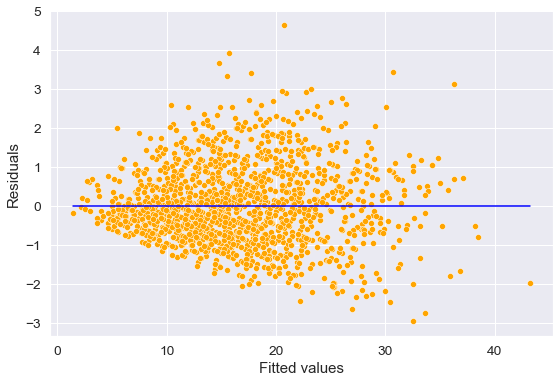

In [43]:
ax = sns.scatterplot(x = model.fittedvalues, y=out.student_resid,color = 'orange')
sns.lineplot(x = [model.fittedvalues.min(),model.fittedvalues.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

In [44]:
np.sum((np.abs(out.student_resid)>3))

8

### High Leverage Points

In [45]:
influence = model.get_influence()
leverage = influence.hat_matrix_diag
average_leverage = (model.df_model+1)/model.nobs
high_leverage_threshold = 4*average_leverage
np.sum(leverage>high_leverage_threshold)

14

### Influential Points

In [46]:
train_filtered = train.drop(np.intersect1d(np.where(np.abs(out.student_resid)>3)[0],
                                           (np.where(leverage>high_leverage_threshold)[0])))

In [47]:
train.shape[0]-train_filtered.shape[0]

0

## Observations

- Very high p-value for `HardHit`, probably should be removed then, made redundant by the quantitative `Barrel` variable anyways
- No overfitting, test RMSE and train RSE line up well
- Linearity assumption seems to be okay
- Constant variance of error terms assumption is definitely violated
    - Model seems to have a much easier time predicting following season totals for players who don't hit very many home runs in the current year
    - This makes sense to an extent as at the top end, HR totals are very volatile, a guy can hit 60 one year and 35 the next, whereas a guy who hits 5 one season isn't suddenly going to hit 25, and injuries also play a small role
- No influential points, so that's good as well

# Engineering a New Model

In [48]:
model = smf.ols(formula = 'np.sqrt(Next_Year_HR)~HR+Barrel+(EV*maxEV)+(HRperFB*FB)+Pull+PA+BB+K+GB', data = train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.sqrt(Next_Year_HR)   R-squared:                       0.430
Model:                               OLS   Adj. R-squared:                  0.425
Method:                    Least Squares   F-statistic:                     87.56
Date:                   Thu, 02 Mar 2023   Prob (F-statistic):          1.35e-173
Time:                           19:06:52   Log-Likelihood:                -2215.6
No. Observations:                   1525   AIC:                             4459.
Df Residuals:                       1511   BIC:                             4534.
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -36.3556     30.104     -1.208      0.227     -95.406      22.695
HR             0.0225      0.009      2.490      0.013       0.005       0.040
Barrel         0.0182      0.017      1.078      0.281      -0.015       0.051
EV             0.3244      0.341      0.952      0.341      -0.344       0.993
maxEV          0.2508      0.275      0.912      0.362      -0.289       0.790
EV:maxEV      -0.0019      0.003     -0.623      0.534      -0.008       0.004
HRperFB        0.0715      0.020      3.511      0.000       0.032       0.111
FB             0.0443      0.013      3.535      0.000       0.020       0.069
HRperFB:FB    -0.0020      0.001     -3.272      0.001      -0.003      -0.001
Pull           0.0202      0.006      3.640      0.000       0.009       0.031
PA             0.0012      0.000      3.149      0.002       0.000       0.002
BB            -0.0099      0.009     -1.096      0.273      -0.028       0.008
K             -0.0072      0.006     -1.151      0.250      -0.019       0.005
GB            -0.0133      0.009     -1.490      0.136      -0.031       0.004
==============================================================================
Omnibus:                        7.252   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                7.201
Skew:                          -0.166   Prob(JB):                       0.0273
Kurtosis:                       3.052   Cond. No.                     1.11e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### RSE

In [49]:
np.sqrt(((train['Next_Year_HR'] - (model.fittedvalues**2))**2).mean())

8.228178200686317

### RMSE

In [50]:
pred = model.predict(test)
np.sqrt(((test['Next_Year_HR'] - (pred**2))**2).mean())

8.100265313869809

## Residual Plot

Text(0, 0.5, 'Residuals')

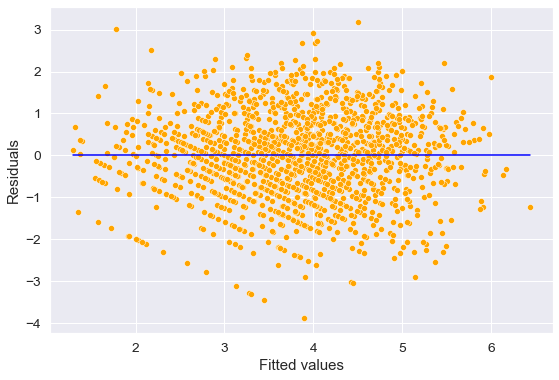

In [51]:
sns.set(font_scale=1.25)
ax = sns.scatterplot(x = model.fittedvalues, y=model.resid,color = 'orange')
sns.lineplot(x = [model.fittedvalues.min(), model.fittedvalues.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

## Outlier Detection

### Outliers

In [52]:
out = model.outlier_test()

Text(0, 0.5, 'Residuals')

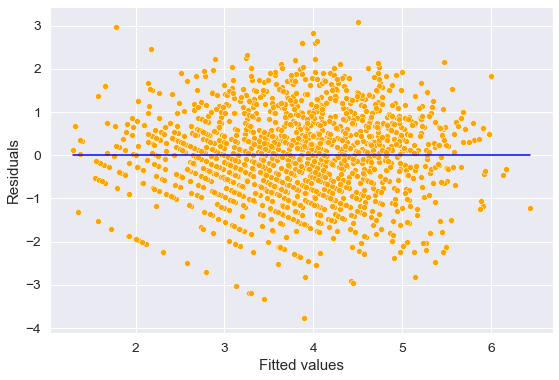

In [53]:
ax = sns.scatterplot(x = model.fittedvalues, y=out.student_resid,color = 'orange')
sns.lineplot(x = [model.fittedvalues.min(),model.fittedvalues.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

In [54]:
np.sum((np.abs(out.student_resid)>3))

6

### High Leverage Points

In [55]:
influence = model.get_influence()
leverage = influence.hat_matrix_diag
average_leverage = (model.df_model+1)/model.nobs
high_leverage_threshold = 4*average_leverage
np.sum(leverage>high_leverage_threshold)

16

### Influential Points

In [56]:
train_filtered = train.drop(np.intersect1d(np.where(np.abs(out.student_resid)>3)[0],
                                           (np.where(leverage>high_leverage_threshold)[0])))

In [57]:
train.shape[0]-train_filtered.shape[0]

0

## Observations

- Few predictors with high p-values now
- Able to get train RSE and test RMSE to go down slightly though
- Linearity assumption and constant variance of error terms assumption both look much better with taking the square root of the response
- Still no influential points, which is also good
- **Think this is basically the best possible, and if it isn't, it's close**

# Trying Lasso Because Why Not

In [58]:
y = train['Next_Year_HR']
X = train.iloc[:,[1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19]]
scaler = StandardScaler()
scaler.fit(X)
Xstd = scaler.transform(X)

In [59]:
alphas = 10**np.linspace(10,-2,100)*0.1

In [60]:
lasso = Lasso(max_iter = 10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(Xstd, y)
    coefs.append(lasso.coef_)

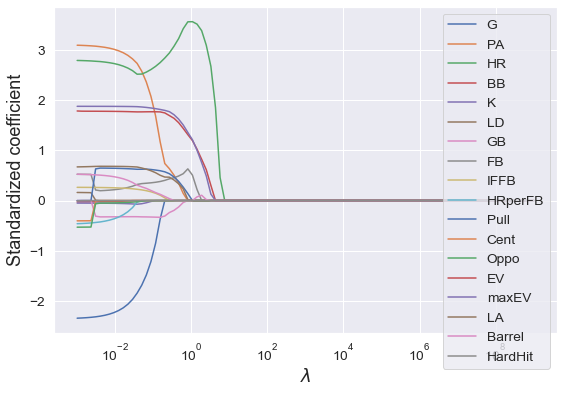

In [61]:
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')
plt.legend(train.columns[[1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19]]);

In [62]:
alphas = 10**np.linspace(-1,-5,200)*0.5
lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000)
lassocv.fit(Xstd, y)
lassocv.alpha_

0.05

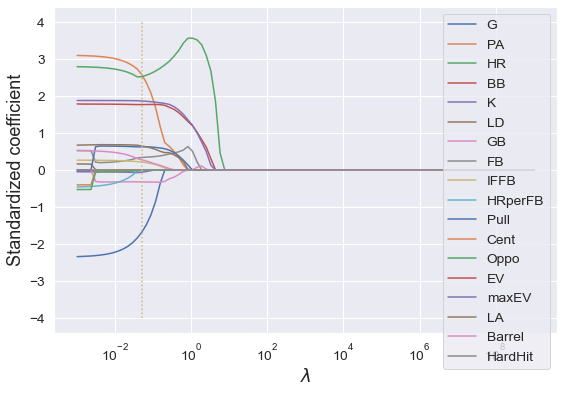

In [63]:
alphas = 10**np.linspace(10,-2,100)*0.1
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')
plt.legend(train.columns[[1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19]]);
plt.plot([lassocv.alpha_,lassocv.alpha_],[-4,4],':')

### RSE

In [64]:
lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(Xstd, y)
pred=lasso.predict(Xstd)
np.sqrt(((pred-train['Next_Year_HR'])**2).mean())

8.141505675471118

### RMSE

In [65]:
Xtest = test.iloc[:,[1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19]]
Xtest_std = scaler.transform(Xtest)

In [66]:
lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(Xstd, y)
pred=lasso.predict(Xtest_std)

In [67]:
np.sqrt(((pred-test['Next_Year_HR'])**2).mean())

8.136334981853635

### Coefficients and $R^2$

In [68]:
lasso.coef_

array([-1.68038103,  2.56960505,  2.51588206, -0.        , -0.06249362,
        0.        , -0.32402915,  0.3373001 ,  0.21207321, -0.        ,
        0.62269778, -0.        , -0.01402876,  1.76347944,  1.86058027,
        0.64702814,  0.27226912,  0.        ])

In [69]:
r2_score(lasso.predict(Xstd),y)

-0.45469770476085425

# Formula

$\text{Next_Year_HR} = -1.68 \cdot \text{G} + 2.57 \cdot \text{PA} + 2.52 \cdot \text{HR} -0.06 \cdot \text{K_pct} - 0.32 \cdot \text{GB_pct} + 0.34 \cdot \text{FB_pct} + 0.21 \cdot \text{IFFB_pct} + 0.62 \cdot \text{Pull_pct} - 0.01 \cdot \text{Oppo_pct} + 1.76 \cdot \text{Avg_EV} + 1.86 \cdot \text{max_EV} + 0.65 \cdot \text{Avg_LA} + 0.27 \cdot \text{Barrel_pct}$

# Making Predictions for the 2023 Season

In [70]:
dashboard_2022_merge = dashboard_2022.loc[:, ['Name', 'G', 'PA', 'HR', 'BB%', 'K%', 'playerid']]
batted_ball_2022_merge = batted_ball_2022.loc[:, ['LD%', 'GB%', 'FB%', 'IFFB%', 'HR/FB', 'Pull%', 'Cent%', 'Oppo%', 'playerid']]
statcast_2022_merge = statcast_2022.loc[:, ['EV', 'maxEV', 'LA', 'Barrel%', 'HardHit%', 'playerid']]

temp_frame_2022 = pd.merge(dashboard_2022_merge, batted_ball_2022_merge, on = 'playerid')
temp_frame_2022_2 = pd.merge(temp_frame_2022, statcast_2022_merge, on = 'playerid')

temp_frame_2022_2['Year'] = 2022

player_data_2022 = temp_frame_2022_2

player_data_2022 = player_data_2022.rename(columns = {'Barrel%': 'Barrel', 'HardHit%': 'HardHit', 'HR/FB': 'HRperFB', 'BB%':'BB', 'K%':'K', 'FB%':'FB', 'Pull%':'Pull', 'GB%':'GB', 'LD%':'LD','IFFB%':'IFFB', 'Cent%':'Cent', 'Oppo%':'Oppo'})
player_data_2022.loc[:, 'G':] = player_data_2022.loc[:, 'G':].apply(remove_percentage_sign)

In [71]:
Xpredict = player_data_2022.iloc[:,[1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19]]
Xpredict_std = scaler.transform(Xpredict)
predictions=lasso.predict(Xpredict_std)

In [72]:
player_data_2022['Predicted_HR_2023'] = predictions
player_data_2022['Predicted_HR_2023_Integers'] = player_data_2022['Predicted_HR_2023'].astype(int)
player_data_2022 = player_data_2022.sort_values(by = 'Predicted_HR_2023', ascending = False)

In [73]:
player_data_2022.loc[:, ['Name', 'Predicted_HR_2023_Integers']].head(20)

,Name,Predicted_HR_2023_Integers
0,Aaron Judge,42
80,Kyle Schwarber,34
6,Yordan Alvarez,32
15,Mike Trout,31
60,Matt Olson,31
18,Austin Riley,30
194,Giancarlo Stanton,30
42,Pete Alonso,30
47,Shohei Ohtani,30
40,Byron Buxton,29


In [74]:
player_data_2022.loc[:, ['Name', 'Predicted_HR_2023_Integers']].tail(20)

,Name,Predicted_HR_2023_Integers
185,Joey Wendle,6
257,Matt Reynolds,6
327,Sheldon Neuse,6
232,Geraldo Perdomo,6
126,Myles Straw,5
291,Sergio Alcantara,5
209,Tomas Nido,5
277,P.J. Higgins,5
304,Alfonso Rivas,5
175,Luis Guillorme,5


In [75]:
player_data_2022.loc[player_data_2022['Name'] == 'Luis Robert', ['Name', 'Predicted_HR_2023_Integers']]

,Name,Predicted_HR_2023_Integers
116,Luis Robert,19


In [76]:
player_data_2022['Difference_in_HR'] = player_data_2022['Predicted_HR_2023_Integers'] - player_data_2022['HR']
player_data_2022 = player_data_2022.sort_values(by = 'Difference_in_HR', ascending = False)

In [77]:
player_data_2022.loc[:, ['Name', 'Difference_in_HR', 'Predicted_HR_2023_Integers']].head(20)

,Name,Difference_in_HR,Predicted_HR_2023_Integers
328,Sam Hilliard,14,16
244,Enrique Hernandez,11,17
310,Franchy Cordero,10,18
130,Seby Zavala,10,12
240,Jorge Soler,10,23
186,Leody Taveras,9,14
325,Mike Moustakas,9,16
51,Yandy Diaz,9,18
263,Mitch Garver,9,19
189,Oneil Cruz,9,26


In [78]:
player_data_2022.loc[:, ['Name', 'Difference_in_HR', 'Predicted_HR_2023_Integers']].tail(20)

,Name,Difference_in_HR,Predicted_HR_2023_Integers
91,Anthony Rizzo,-6,26
1,Manny Machado,-6,26
28,Daulton Varsho,-6,21
38,Eugenio Suarez,-6,25
66,Brandon Drury,-6,22
26,Kyle Tucker,-6,24
183,C.J. Cron,-6,23
27,Willy Adames,-7,24
63,Nathaniel Lowe,-7,20
220,Rowdy Tellez,-7,28
